In [24]:
# 1. Importar librerías necesarias

import os
os.environ["OMP_NUM_THREADS"] = "4"  # Limita los hilos para evitar memory leak en Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Para mostrar gráficos en Jupyter Notebook
%matplotlib inline

# 2. Cargar el dataset (asegúrate de tener la ruta correcta)
dataset = pd.read_csv('archivo_gym_members_exercise_tracking_version2.csv')

### Paso 3. Seleccion de las variables fisicas que se usaran para clustering

In [25]:
# 3. Seleccionar las variables físicas que usaremos para clustering
features = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Experience_Level', 'Workout_Frequency (days/week)']
X = dataset[features]

### Paso 4 - Método del Codo para elegir K optimo


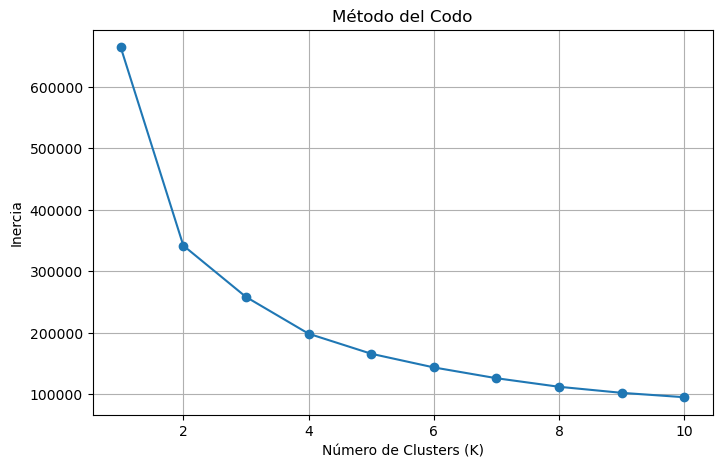

In [26]:
# 4. Método del Codo - Elegir número óptimo de clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Añadido n_init=10 para suprimir warning
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


### Paso 5 - Silhouette Score para confirmar el K. Asignar a cada sesión una etiqueta de cluster (0,1,2,3). Estas etiquetas se añaden al dataset para análisis posterior.

In [27]:
# Aplicamos KMeans con K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Calculamos el Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score para K=4: {score:.4f}")

# Asignar etiquetas de cluster al dataset
dataset['cluster'] = kmeans.labels_

Silhouette Score para K=4: 0.3124


##### _Pasos 4 y 5 Elección del número óptimo de clusters (K=4)_
* Para determinar el número óptimo de clusters, se utilizaron dos métodos complementarios:

1. __Método del Codo:__
Se representó la inercia para valores de K entre 1 y 10. En la gráfica, se observó un cambio notable en la pendiente en torno a K=4, lo que sugiere que aumentar el número de clusters más allá de ese punto proporciona mejoras marginales en la compactación interna de los grupos. Esta inflexión visual en la curva es un criterio habitual para identificar un número adecuado de clusters.

2. __Silhouette Score:__
Se calculó el coeficiente de Silhouette para K=4, obteniéndose un valor de 0.3124. Este valor indica una separación razonable entre clusters, con cohesión interna aceptable. Aunque no es un valor extremadamente alto, es suficientemente sólido como para validar la segmentación, especialmente en datasets reales con cierta variabilidad.

### Paso 6. Los centroides representan el perfil promedio de cada cluster. Son vectores con la media de cada variable física para los puntos de ese cluster.

In [28]:
# 6. Obtener los centroides (puntos medios) de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\n #6. Centroides de los clusters:")
print(centroids)


 #6. Centroides de los clusters:
         Age    Gender  Weight (kg)  Height (m)        BMI  Fat_Percentage  \
0  26.168724  0.226337    60.470782    1.671523  21.865062       26.876132   
1  36.604317  1.000000   113.860432    1.796619  35.719496       24.936691   
2  47.918301  0.303922    57.745425    1.689346  20.520523       26.533660   
3  40.452632  0.785965    83.050877    1.765684  26.954386       21.705263   

   Experience_Level  Workout_Frequency (days/week)  
0          1.740741                       3.251029  
1          1.482014                       2.928058  
2          1.754902                       3.271242  
3          2.087719                       3.628070  


In [29]:
for i, row in centroids.iterrows():
 print(f"\nPerfil del Cluster {i}:")
 print(f"\nEdad promedio: {row['Age']:.1f} años")
 print(f"Porcentaje de género masculino: {row['Gender']*100:.1f}%␣ ↪(1=masculino, 0=femenino)")
 print(f"Peso promedio: {row['Weight (kg)']:.1f} kg")
 print(f"Altura promedio: {row['Height (m)']:.2f} m")
 print(f"IMC promedio: {row['BMI']:.1f}")
 print(f"Porcentaje de grasa corporal promedio: {row['Fat_Percentage']:.1f}%")
 print(f"Nivel de experiencia promedio: {row['Experience_Level']:.1f}")
 print(f"Frecuencia de entrenamiento promedio: {row['Workout_Frequency (days/week)']:.1f} días por semana")
 print("----------------------------------------------------------------------------------")


Perfil del Cluster 0:

Edad promedio: 26.2 años
Porcentaje de género masculino: 22.6%␣ ↪(1=masculino, 0=femenino)
Peso promedio: 60.5 kg
Altura promedio: 1.67 m
IMC promedio: 21.9
Porcentaje de grasa corporal promedio: 26.9%
Nivel de experiencia promedio: 1.7
Frecuencia de entrenamiento promedio: 3.3 días por semana
----------------------------------------------------------------------------------

Perfil del Cluster 1:

Edad promedio: 36.6 años
Porcentaje de género masculino: 100.0%␣ ↪(1=masculino, 0=femenino)
Peso promedio: 113.9 kg
Altura promedio: 1.80 m
IMC promedio: 35.7
Porcentaje de grasa corporal promedio: 24.9%
Nivel de experiencia promedio: 1.5
Frecuencia de entrenamiento promedio: 2.9 días por semana
----------------------------------------------------------------------------------

Perfil del Cluster 2:

Edad promedio: 47.9 años
Porcentaje de género masculino: 30.4%␣ ↪(1=masculino, 0=femenino)
Peso promedio: 57.7 kg
Altura promedio: 1.69 m
IMC promedio: 20.5
Porcentaje de

### Paso 7. Saber cuántas sesiones hay en cada cluster nos da una idea del tamaño relativo de cada grupo.


 #7. Cantidad de sesiones por cluster:
cluster
2    306
3    285
0    243
1    139
Name: count, dtype: int64


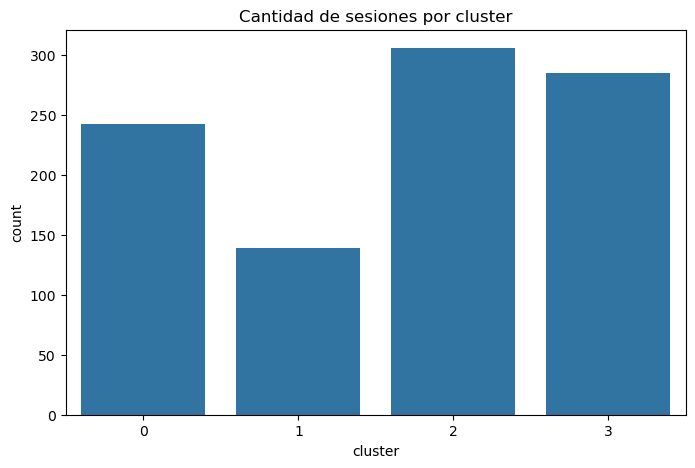

In [30]:
# 7. Ver cuántas sesiones hay en cada cluster
print("\n #7. Cantidad de sesiones por cluster:")
print(dataset['cluster'].value_counts())

# Gráfico de barras para cantidad de sesiones por cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=dataset)
plt.title('Cantidad de sesiones por cluster')
plt.show()

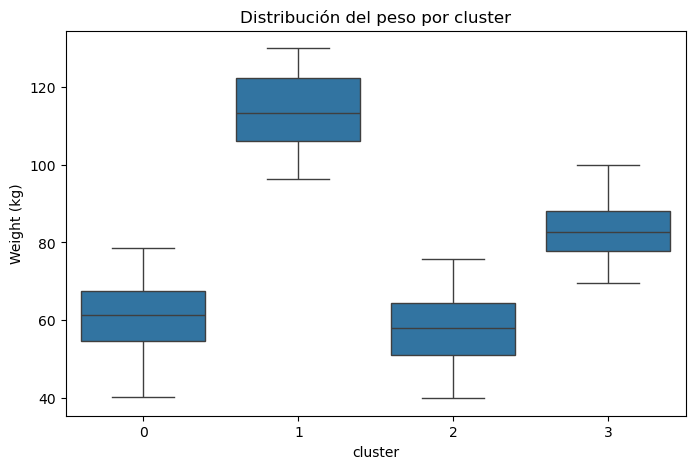

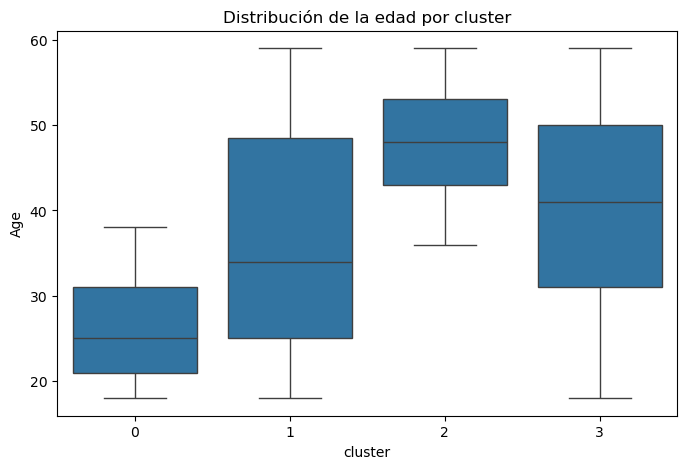

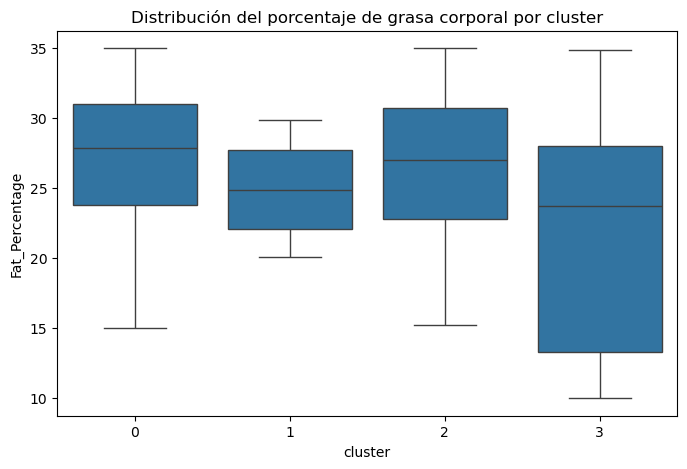

In [31]:
# Boxplot de peso por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Weight (kg)', data=dataset)
plt.title('Distribución del peso por cluster')
plt.show()

# Boxplot de edad por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Age', data=dataset)
plt.title('Distribución de la edad por cluster')
plt.show()

# Boxplot de porcentaje de grasa corporal por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Fat_Percentage', data=dataset)
plt.title('Distribución del porcentaje de grasa corporal por cluster')
plt.show()


### _Interpretacion de centroides_

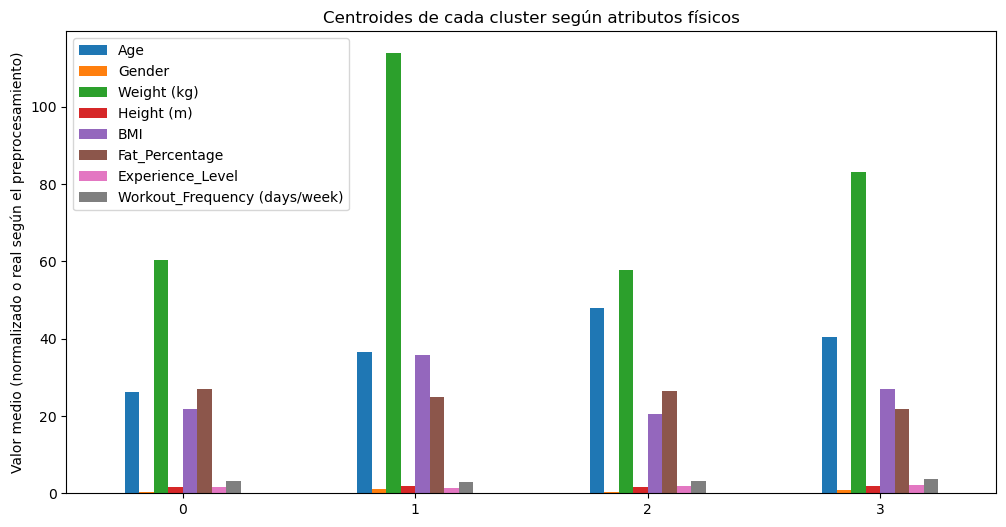

In [32]:
import matplotlib.pyplot as plt

centroids.plot(kind='bar', figsize=(12,6))
plt.title('Centroides de cada cluster según atributos físicos')
plt.ylabel('Valor medio (normalizado o real según el preprocesamiento)')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()


### __Interpretación de la gráfica de centroides__

#### Age (Edad):
* _El cluster 2 agrupa a usuarios más jóvenes, mientras que el cluster 1 los usuarios con edad media más alta._

#### Gender (Género):
* _Se codificó como 0 y 1, donde 1 representa masculino. El cluster 3 es casi exclusivamente masculino._

#### Weight (kg) y Height (m) (Peso y Altura):
* _El cluster 1 tiene un peso claramente mayor que los demás, mientras que el cluster 0 agrupa usuarios con menor peso y altura promedio._

#### BMI (Índice de Masa Corporal):
* _Cluster 1 tiene un IMC más alto, indicando usuarios con mayor masa relativa a su altura._

#### Fat_Percentage (Porcentaje de Grasa Corporal):
* _Valores relativamente estables entre clusters, aunque el cluster 0 tiene un porcentaje algo más bajo._

#### Experience_Level (Nivel de experiencia):
* _Se aprecia que los clusters 0 y 2 tienen niveles de experiencia más altos._

#### Workout_Frequency (Frecuencia de entrenamiento):
* _Similar para todos, ligeramente más alta en cluster 0._


### __Estos centroides representan el "perfil promedio" o "representante típico" de cada cluster, y sirven para:__

* Identificar características principales de cada grupo de usuarios o sesiones.

* Ayudarte a poner nombre o etiquetas a cada cluster según sus atributos (por ejemplo, "usuarios jóvenes y ligeros", "usuarios con alto BMI y peso elevado", etc.).

* Facilitar la comparación y análisis posterior para tomar decisiones o hacer predicciones específicas.

### Paso 10. Visualización tipo PCA para ver cómo se agrupan visualmente los clusters

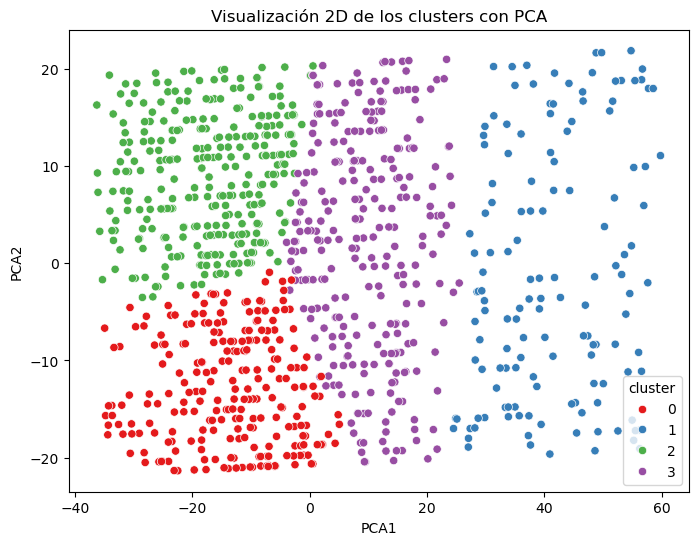

In [33]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df_plot = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = dataset['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_plot, palette='Set1')
plt.title('Visualización 2D de los clusters con PCA')
plt.show()

In [34]:
# Ver frecuencia de cada tipo de ejercicio por cluster
for tipo in ['Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 'Workout_Cardio']:
    print(f'\nFrecuencia media de {tipo} por cluster:')
    print(dataset.groupby('cluster')[tipo].mean())


Frecuencia media de Workout_HIIT por cluster:
cluster
0    0.193416
1    0.237410
2    0.248366
3    0.228070
Name: Workout_HIIT, dtype: float64

Frecuencia media de Workout_Strength por cluster:
cluster
0    0.292181
1    0.215827
2    0.287582
3    0.242105
Name: Workout_Strength, dtype: float64

Frecuencia media de Workout_Yoga por cluster:
cluster
0    0.230453
1    0.237410
2    0.241830
3    0.266667
Name: Workout_Yoga, dtype: float64

Frecuencia media de Workout_Cardio por cluster:
cluster
0    0.283951
1    0.309353
2    0.222222
3    0.263158
Name: Workout_Cardio, dtype: float64


### Conclusiones rápidas por cluster:

__Cluster 0 (C0):__
Predominio del entrenamiento de fuerza. También se practica bastante cardio. Este grupo es joven, con buena forma física → se alinea bien.

__Cluster 1 (C1):__
Más inclinado al cardio. También practican algo de yoga y HIIT. Son perfiles con peso elevado y mayoría hombres, donde el cardio es común para perder grasa.

__Cluster 2 (C2):__
Personas mayores y delgadas, pero con acumulación de grasa corporal, la mayoría mujeres. Tienen una rutina de ejercicio moderadamente estable y experiencia media, lo que sugiere que se cuidan pero podrían beneficiarse de programas de fuerza para ganar masa muscular. HIIT / feurza.

__Cluster 3 (C3):__
Practican más yoga y cardio, lo que tiene sentido si son usuarios más experimentados con mejor forma física, pues diversifican más sus rutinas.